In [57]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [58]:
import tradingWithPython as twp
import tradingWithPython.lib.yahooFinance as yf
import pandas as pd
twp.extra.setNotebookStyle()

# 获取XLE能源指数的成分股名单

In [59]:
import urllib.request, urllib.parse, urllib.error

In [60]:
urllib.request.urlretrieve('http://www.sectorspdr.com/sectorspdr/IDCO.Client.Spdrs.Holdings/Export/ExportCsv?symbol=xle', 'xle.csv')
#读取网络csv，然后保存为xle.csv

('xle.csv', <http.client.HTTPMessage at 0x2130a8cb710>)

In [61]:
xleComponents = pd.read_csv('xle.csv', sep=',', skiprows=1) #读取csv
xleComponents

,Symbol,Company Name,Index Weight,Last,Change,%Change,Volume,52 Week Range,Unnamed: 8
0,XOM,Exxon Mobil Corp,15.87%,82.94,-0.95,-1.13%,15.11 M,73.55 - 95.55,NaN
1,CVX,Chevron Corp,14.63%,111.00,-0.35,-0.31%,5.89 M,79.85 - 119.00,NaN
2,SLB,Schlumberger Ltd,8.26%,83.17,-0.54,-0.65%,5.19 M,66.10 - 87.84,NaN
3,EOG,EOG Resources,4.86%,101.00,-0.58,-0.57%,3.03 M,62.53 - 109.37,NaN
4,PXD,Pioneer Natural Resources,4.75%,180.66,0.43,+0.24%,1.48 M,105.22 - 195.00,NaN
...,...,...,...,...,...,...,...,...,...
31,HP,Helmerich & Payne Inc,0.53%,71.10,-0.06,-0.08%,2.70 M,44.30 - 85.78,NaN
32,CHK,Chesapeake Energy Corp,0.43%,6.40,-0.05,-0.78%,33.98 M,1.50 - 8.20,NaN
33,MUR,Murphy Oil Corp,0.43%,28.84,-0.07,-0.24%,5.34 M,15.23 - 37.48,NaN
34,SWN,Southwestern Energy Co,0.38%,8.88,-0.13,-1.44%,13.61 M,5.30 - 15.59,NaN


In [62]:
symbols = xleComponents['Symbol'].tolist() #将dataframe的某lie,也就是series变成list
symbols.append('XLE') #把指数自身也加进去

In [63]:
hData = yf.HistData() #建立可以获取多股票数据的数据对象
hData.startDate = (2009,1,1)
hData.downloadData(symbols)

 [*********************100%***********************]  37 of 37 complete

Last dataset date: 2016-02-03 00:00:00


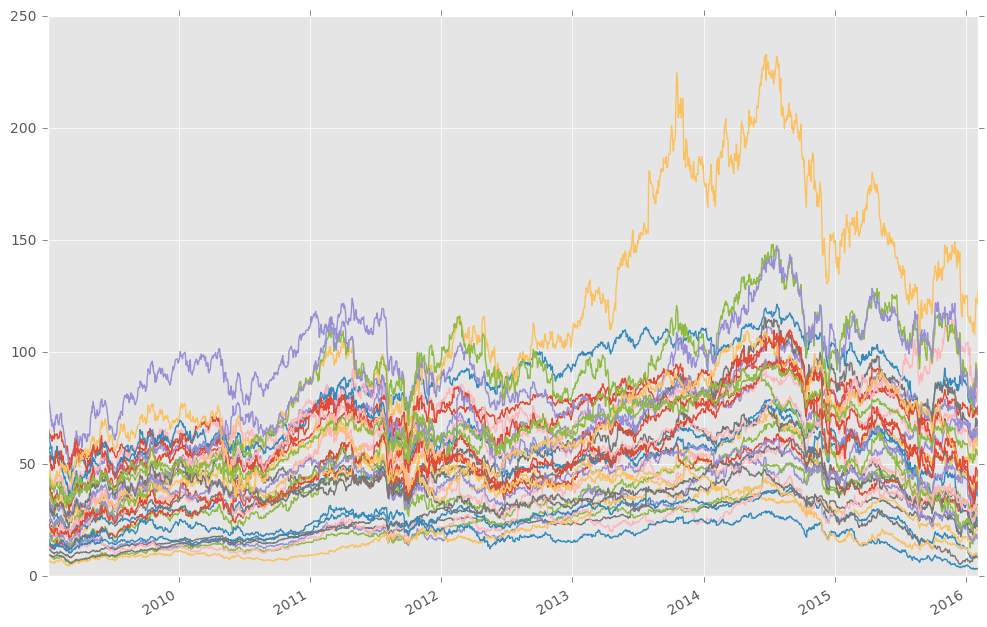

In [64]:
C = hData.getDataFrame('close')[:-250]
C = C.dropna(axis=1)
C.plot(legend=False)
print('Last dataset date:' , C.index[-1]) 

In [65]:
C

,XOM,CVX,SLB,EOG,PXD,HAL,OXY,APC,COP,VLO,...,OKE,EQT,RRC,NFX,HP,CHK,MUR,SWN,RIG,XLE
2009-01-02,65.43,57.05,39.69,33.28,17.90,17.50,47.67,38.28,30.46,17.61,...,9.40,31.89,36.22,21.11,21.36,14.86,31.82,31.09,43.05,42.54
2009-01-05,65.42,57.15,40.73,33.41,19.28,17.70,47.35,39.06,30.80,18.64,...,9.46,33.08,38.16,22.16,22.74,15.60,33.09,32.87,44.96,43.54
2009-01-06,64.35,57.66,41.41,33.62,19.91,18.82,47.27,39.80,30.92,18.91,...,9.54,32.46,37.82,23.34,23.25,16.43,34.14,33.74,47.12,44.01
2009-01-07,62.71,55.14,39.68,32.46,19.30,18.62,44.57,37.83,29.56,17.94,...,9.24,31.11,35.99,21.69,21.94,15.74,32.05,31.80,45.45,42.14
2009-01-08,63.39,55.35,39.87,32.91,19.74,19.04,45.25,39.49,29.98,18.64,...,9.31,31.09,36.97,22.37,22.08,15.16,33.24,31.01,46.88,42.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-28,74.36,82.26,67.73,68.12,119.95,29.93,63.21,37.11,37.07,61.95,...,22.65,59.84,27.79,27.58,47.14,3.16,17.53,8.54,10.03,55.16
2016-01-29,75.19,82.78,70.42,70.49,123.89,31.25,66.05,38.95,38.11,65.15,...,23.60,61.63,29.50,29.07,48.40,3.39,18.63,8.89,10.42,56.77
2016-02-01,73.69,81.65,69.63,68.57,122.23,31.08,63.88,38.11,37.64,65.94,...,22.21,59.77,28.20,28.17,47.57,3.21,17.48,8.50,9.79,55.83
2016-02-02,72.05,77.78,67.07,66.66,121.46,30.00,62.84,39.12,35.68,62.66,...,21.91,58.00,26.93,26.62,44.42,2.99,16.56,8.17,9.05,53.97


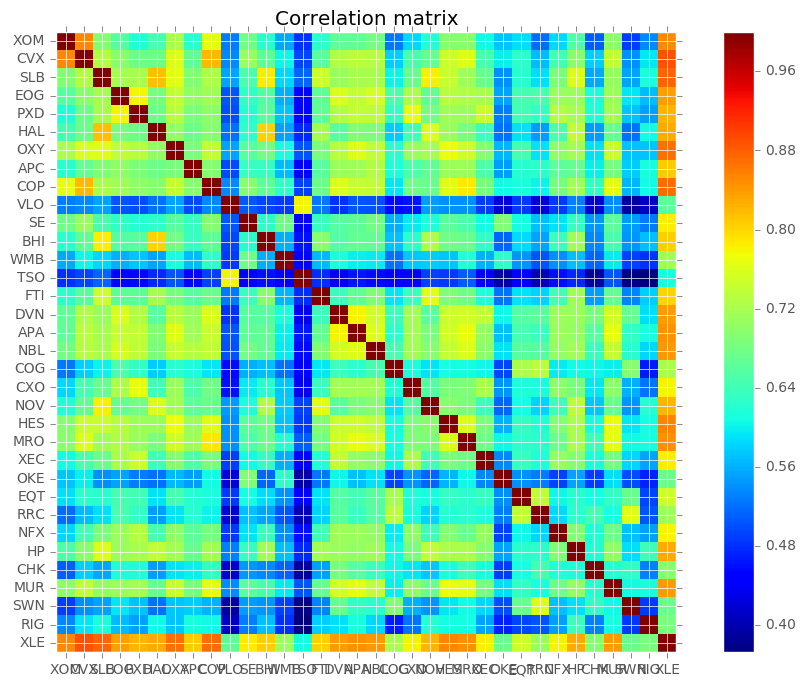

In [66]:
cMat = twp.plotCorrelationMatrix(C)

In [67]:
cMat.to_excel('correlation_matrix.xls')

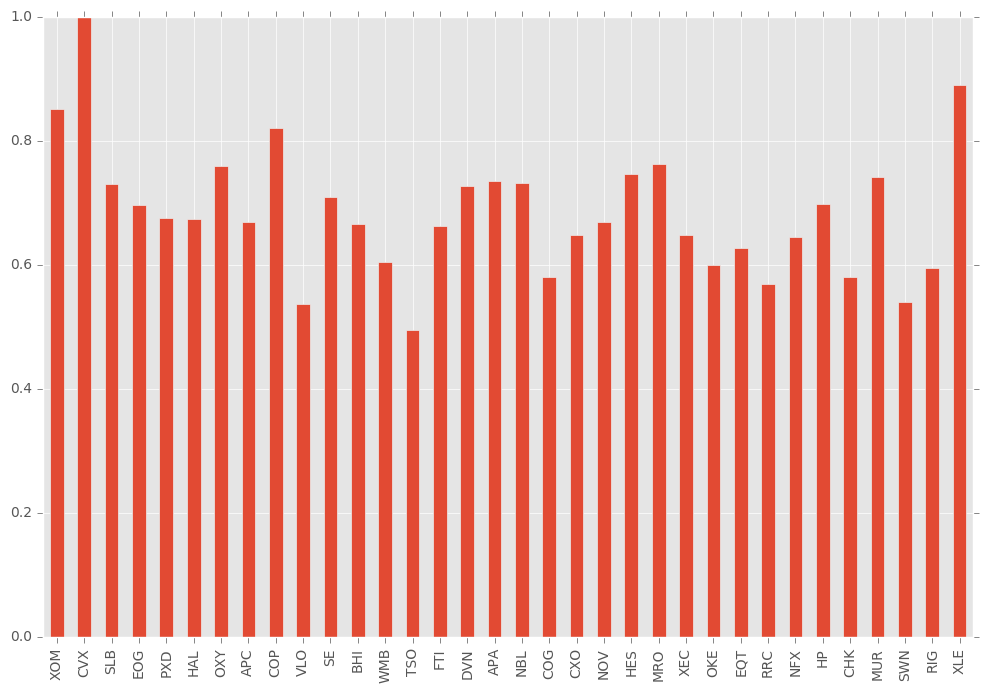

In [68]:
cMat['CVX'].plot(kind='bar')

In [69]:
def buildSpread(priceMat, symbolX, symbolY):
    '''
    calculate a spread return from price matix between x and y
    x 100$ long position 
    y 100$/beta short position. beta adjusted
    returen daily spread change
    Parameters:
    ===========
    priceMat: DataFrame 
        price series of stocks in analysis matrix
    symbolX: str
        stock x's name
    symbolY: str
        stock y's name       
    '''
    
    beta = twp.estimateBeta(priceMat[symbolY], priceMat[symbolX])
    capitalX = 100
    capitalY = - 100 / beta
    print('capital %s: %.2f$ capita: %s %.2f$ ' %(symbolX, capitalX, symbolY, capitalY))
    ret = priceMat[[symbolX, symbolY]].pct_change()
    ret_pair = ret[symbolX] * capitalX + ret[symbolY] * capitalY #看来也是当日rebalance
    
    return ret_pair.dropna()    



In [70]:
R = buildSpread(C, 'CVX', 'XOM')

capital CVX: 100.00$ capita: XOM -132.84$ 


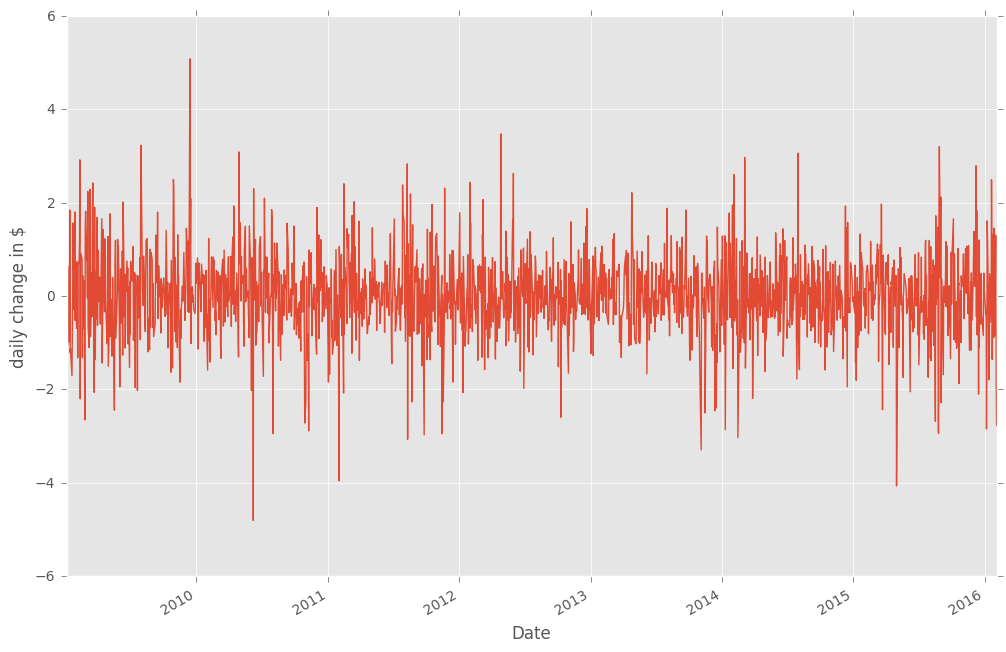

In [71]:
R.plot() #daily rebalanced strategy, show daily gain or loss for longing x and shorting y
xlabel('Date')
ylabel('daily change in $')

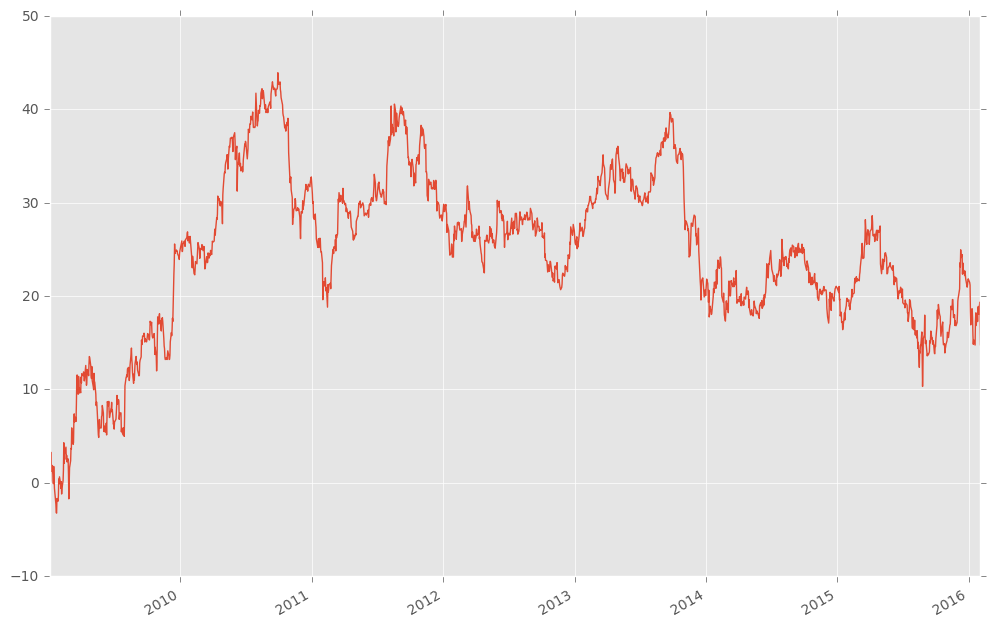

In [72]:
R.cumsum().plot()

# normality test


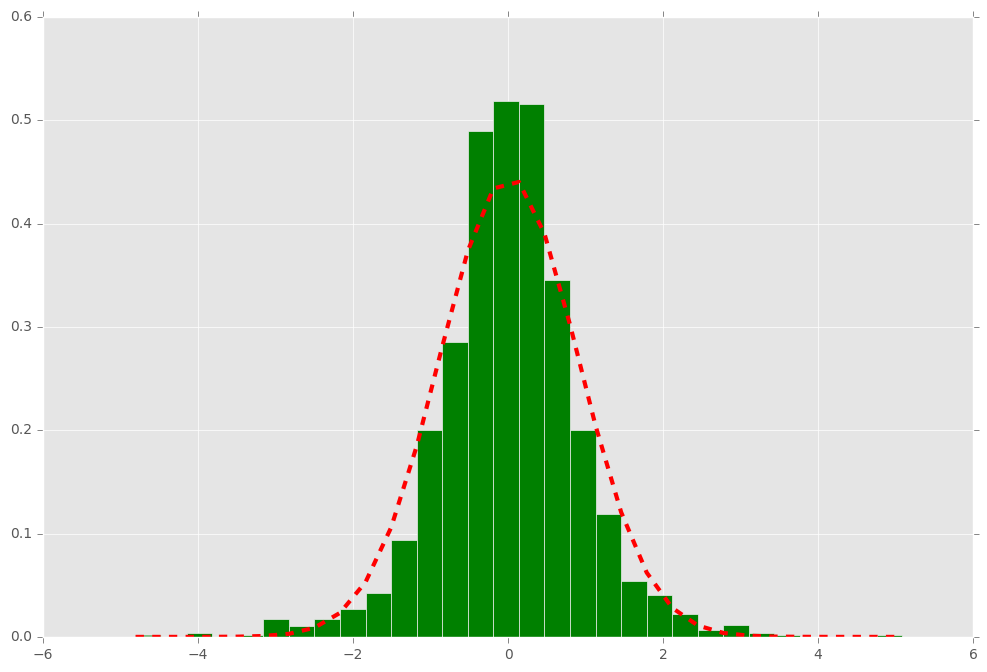

In [73]:
n, bins, patches = hist(R, 30, normed=1, facecolor='green') #bins应该是代表横坐标的各点位置 #normed=1，使柱状图的积分，面积和 = 1。不仅仅是高，还要乘以宽，累加，和为1. 
y = normpdf(bins, R.mean(), R.std()) #用R的参数建立一个正太分布
plot(bins, y, 'r--', linewidth=3)

# 中间高了，两端的极端情况就需要多一些才能实现均值不变（相对于正态分布）。那就是fat tail，风险大。 higher kurtosess fatter tail and risk

C:\Users\User\Anaconda2\envs\py35\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=10).std()
  app.launch_new_instance()
C:\Users\User\Anaconda2\envs\py35\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=10).mean()


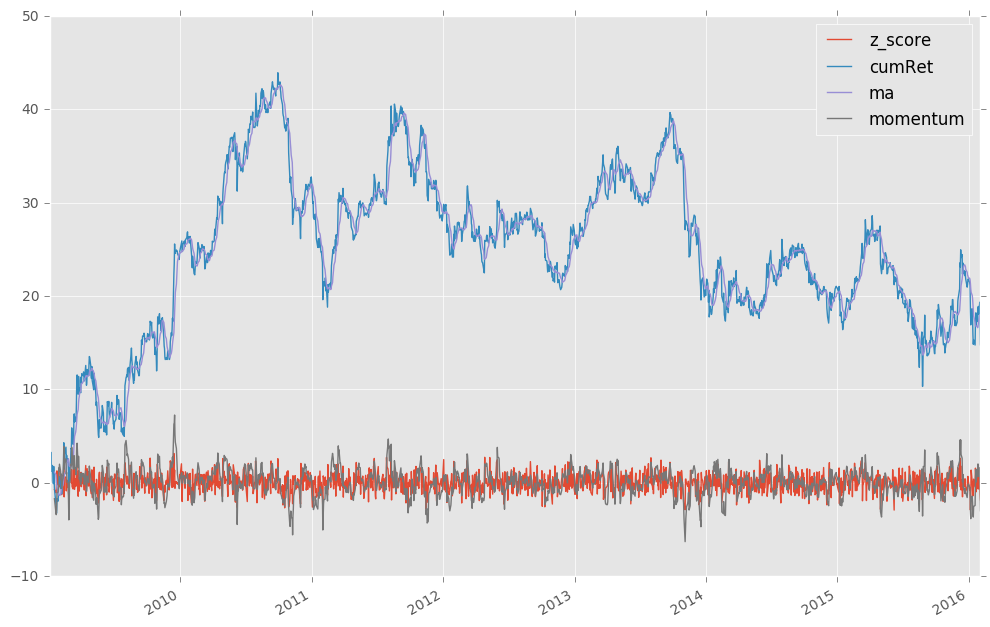

In [74]:
indicator = pd.DataFrame(index=R.index) #这个应该是买入信号表
windows = 10 #回溯窗口
indicator['z_score'] = R / pd.rolling_std(R, windows) #计算当日收益/当日收益滚动方差，得到z_score
indicator['cumRet'] = R.cumsum() #该列代表累计收益
indicator['ma'] = pd.rolling_mean(indicator['cumRet'], windows) #计算10日平均累计收益
indicator['momentum'] = indicator['cumRet'] - indicator['ma'] #计算累计收益偏离10日平均累计收益的偏离度，计算涨幅动能大小
indicator.plot()

In [75]:
data = indicator.copy()

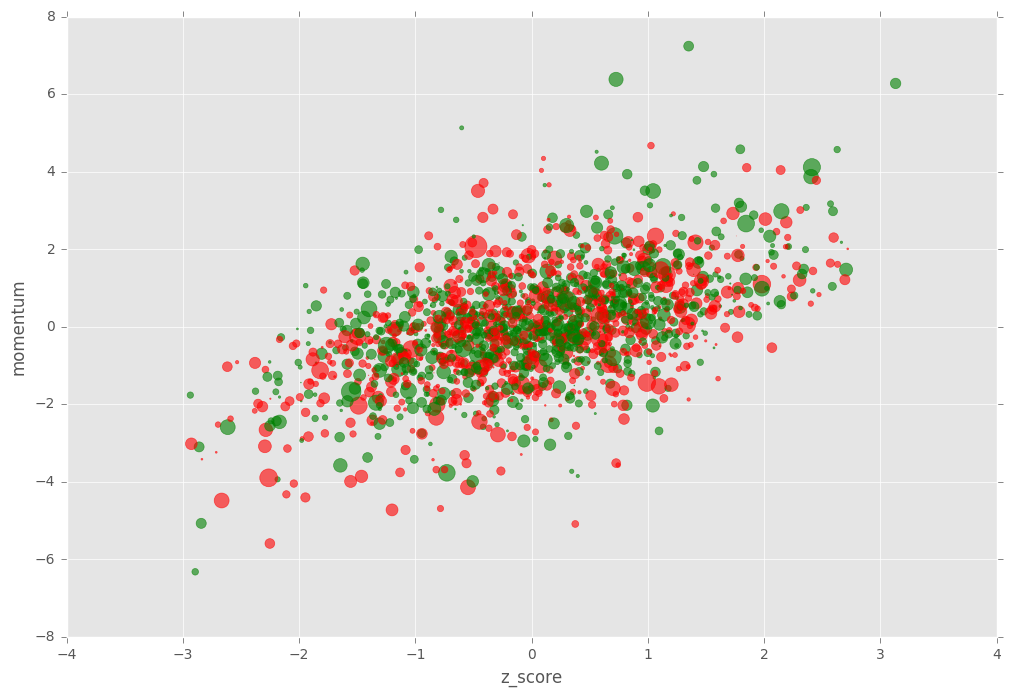

In [76]:
'''
如果上涨用绿色
下跌用红色
涨跌幅越大，圆点的直径越大
用两个因子，z score（当日涨幅相对于波动率的系数）， 以及上涨动能momentum作归因
'''
data['R'] = R #当日收益
data['R_Next'] = R.shift(-1) #次日收益
color = pd.Series(index=data.index, data='white')
color[data['R_Next']>0] = 'green' #如果第二天上涨，用绿色
color[data['R_Next']<0] = 'red' #如果第二天下跌用红色
scatter(data['z_score'], data['momentum'], s=np.abs(50*data['R_Next']), color=color.tolist(), alpha=0.6 ) #color要变成list
grid(True)
xlabel('z_score')
ylabel('momentum')


## 上图基本是杂乱无章，没有规律。难以建立交易策略。 

In [83]:
class StrategyMR1(object):
    '''
    Mean Reverting Strategy #01
    '''
    def __init__(self, ret, window=50):
        '''
        Parameter:
        =========
        ret: Data.Series
        Dataset about returns
        window: int
        Number of days to rolling back    
        ''' 
        self.ret = ret #daily return
        self.price = ret.cumsum() #synthetic price
        self.window = window # window length for rolling
    
        #建立一些指数
        self.z_score = self.ret / pd.rolling_std(self.ret, window) # calculating the z_score 
        self.aboveAverage = self.price > pd.rolling_mean(self.price, window) #to judge whether the price is abover the average price. Return boll value. 
        
        #注意！self这两个指数虽然没有单独建立表列，但是由于其来自ret，所以也有index，也可以作为同样index序列的条件判断语句。 
        
    def backtest(self, z_enter=2.):
        '''
        backtest with a given z_score as input of the function
        '''
        pos = pd.Series(
            index = self.price.index, 
            data = 0        
        )
        # positon 列表
        pos[self.aboveAverage & (self.z_score > z_enter)] = -1 #如果价格高于均值，且z指数大于2（默认值），则short。价格太高均值回归。
        
        #特别注意！！！
        #第二个条件self.z_score大于z_enter必须要加一个括号括起来。        
        #并不用建立self.aboveAverage的列，直接来判断，确定特定的index
        
        pos[~self.aboveAverage & (self.z_score < z_enter)] = 1 #如果价格低于均值，且z指数小于2， 则long待涨。 
        #对于布尔值为false 前面加波浪线
        
        pos = pos.shift(1) #当日决策，收盘（因为输入的价格数据也都是close，当日结束才能知道到底是什么涨跌情况）操作，影响的是下一天的收益。 
        pnl = self.ret * pos # 
        return pnl
    
    def optimize(self, plotOn=False):
        '''
        optimize and optionaly plot pnl
        '''
        z_enter = np.arange(0.5,3.0,0.1) #try from 0.5 till 3.0, pacespace of 0.1        
        sharpe = pd.Series(index=z_enter, data=np.nan) # 用来储存不同z_enter的测试结果sharpe ratio
        for z in z_enter:
            pnl = self.backtest(z_enter=z)
            sharpe[z] = twp.sharpe(pnl)
            if plotOn:
                pnl.cumsum().plot()
        return sharpe

In [84]:
R = buildSpread(C, 'CVX', 'COP') #获得一组，short_long spread 的收益数据列

capital CVX: 100.00$ capita: COP -105.04$ 


C:\Users\User\Anaconda2\envs\py35\lib\site-packages\ipykernel\__main__.py:19: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=20).std()
C:\Users\User\Anaconda2\envs\py35\lib\site-packages\ipykernel\__main__.py:20: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=20).mean()


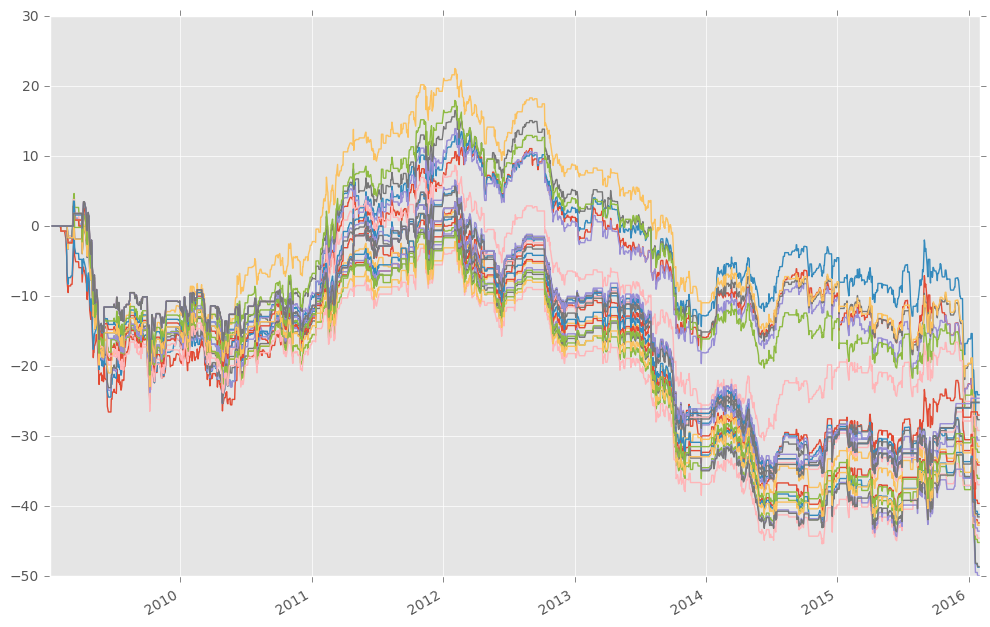

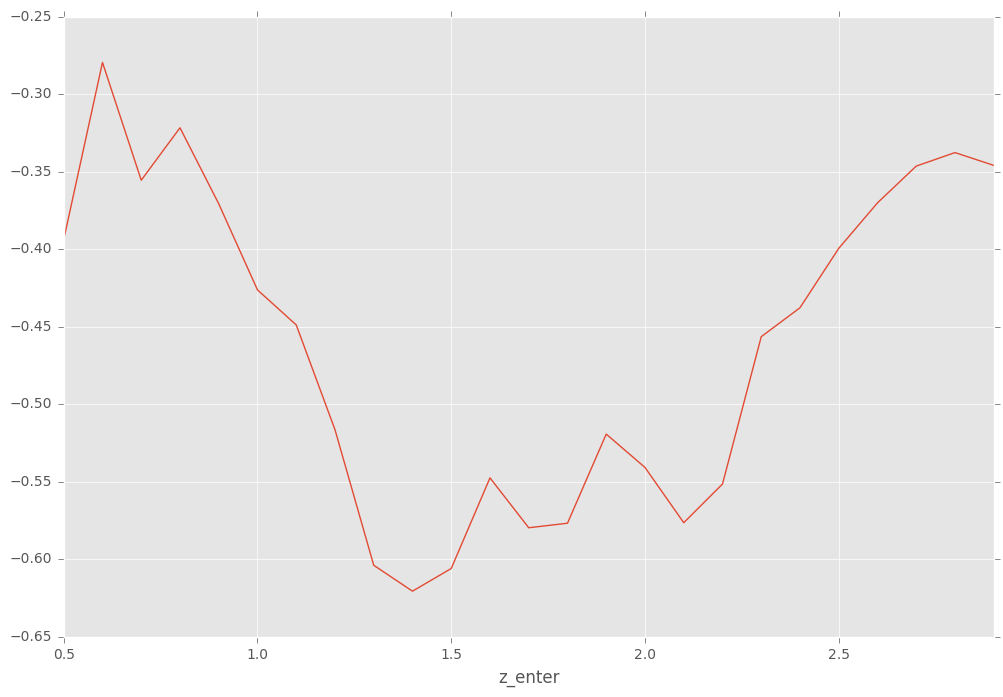

In [85]:
s = StrategyMR1(R, window=20)
sharpe = s.optimize(plotOn=True) #应该画几十条曲线
figure() #另起画一个图
sharpe.plot() #sharpe本身是一个列表，列出不同的z enter得到的sharpe ration
xlabel('z_enter')
grid(True)